<a href="https://colab.research.google.com/github/abdullahhabib6/AI-TRASH-TINYML-ARDNANO33/blob/main/GarbageClassificationMobileNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import concurrent.futures


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, regularizers
# Various Layers that can be part of the network
from tensorflow.keras.layers import (Conv2D, ZeroPadding2D, Activation, Input,
                                     SeparableConv2D, BatchNormalization,
                                     MaxPooling2D, AveragePooling2D, Lambda,
                                     Flatten, Dense,Dropout)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                 img_to_array)
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import datetime
import matplotlib.image as image
from PIL import Image
from tensorflow.keras.losses import BinaryCrossentropy
%matplotlib inline
import concurrent.futures as multi
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

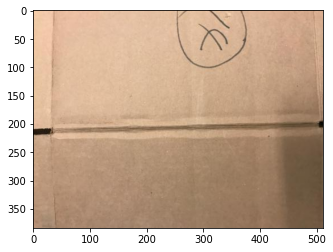

In [3]:
DATADIR = '/content/drive/My Drive/GarbageClassification'
CATEGORIES = ["cardboard" , "glass" , "metal" , "paper" , "plastic", "trash"]

for category in CATEGORIES:
    path = os.path.join(DATADIR , category) #path to the fire or non-fire directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        break
    break

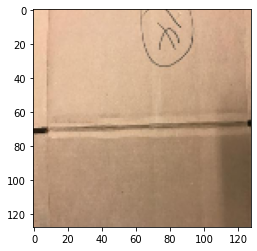

In [4]:
IMG_WIDTH = IMG_HEIGHT = 128
DEPTH = 3
BATCH_SIZE = 32
EPOCHS = 10
shuffle = False
new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
plt.imshow(new_rgb)
plt.show()


In [5]:
training_data = [] 
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR , category) 
        class_num = CATEGORIES.index(category)
        import matplotlib.image as mpimg
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
                new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_rgb,class_num]) 
            except Exception as e:
                pass


create_training_data()

In [ ]:
#data_augmentation = tf.keras.Sequential([
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     #layers.experimental.preprocessing.RandomRotation(0.2)])


In [ ]:
#data_augmentation = tf.keras.Sequential([
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     #layers.experimental.preprocessing.RandomRotation(0.2)])

#augmented_data = []

def augment_training_data():
  for category in CATEGORIES:
    path = os.path.join (DATADIR , category)
    class_num2 = CATEGORIES.index(category)
    import matplotlib.image as mpimg
    for img in os.listdir(path):
      try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
          new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
          arrayimg = img_to_array(new_rgb)
          augmented_image = data_augmentation(tf.expand_dims(arrayimg,0))
          augmented_data.append([augmented_image,class_num2])
      except Exception as e:
          pass
 
#augment_training_data()        

In [6]:
print(len(training_data))
#print(len(augmented_data)) 

2527


In [7]:
import random 

random.shuffle(training_data)
#random.shuffle(augmented_data)

In [8]:
for sample in training_data[:5]:
    print(sample[0])

[[[239 209 175]
  [236 206 172]
  [232 202 168]
  ...
  [249 209 174]
  [247 220 181]
  [188 182 169]]

 [[237 207 173]
  [237 207 173]
  [233 203 169]
  ...
  [252 212 176]
  [249 222 181]
  [173 167 154]]

 [[233 203 169]
  [233 203 169]
  [235 205 171]
  ...
  [250 211 173]
  [245 218 176]
  [180 174 159]]

 ...

 [[235 210 180]
  [235 210 181]
  [237 211 186]
  ...
  [ 59  47  33]
  [ 61  49  35]
  [ 62  50  36]]

 [[239 214 185]
  [238 212 186]
  [233 207 183]
  ...
  [ 59  47  33]
  [ 60  48  34]
  [ 61  49  35]]

 [[241 215 188]
  [238 212 187]
  [234 208 185]
  ...
  [ 59  47  33]
  [ 59  47  33]
  [ 60  48  34]]]
[[[176 132  85]
  [176 132  85]
  [180 136  89]
  ...
  [150 151 155]
  [150 151 155]
  [148 149 153]]

 [[177 133  86]
  [177 133  86]
  [184 140  93]
  ...
  [150 151 155]
  [149 150 154]
  [147 148 152]]

 [[180 136  89]
  [173 129  82]
  [179 135  88]
  ...
  [150 151 155]
  [148 149 153]
  [146 147 151]]

 ...

 [[155 150 144]
  [237 232 226]
  [228 223 217]
  ..

In [ ]:
#for sample in augmented_data[:5]:
    #print(sample[0])

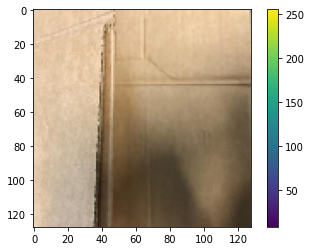

0


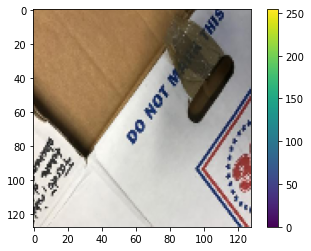

0


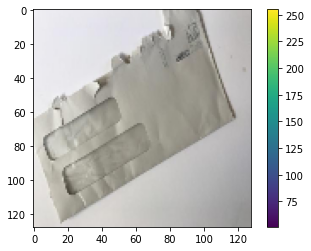

3


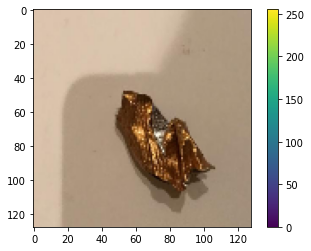

2


In [9]:
for sample in training_data[:4]: #Pre-processing of data by saving the data into a single list variable 
    plt.figure()
    plt.imshow(sample[0]) #It provides the original image set at [0] and the resultant set i.e. y(labels) at [1]
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(sample[1]) #checking the correctness of the label 

In [ ]:
#augmented_data = np.array(augmented_data).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) 

#for sample in augmented_data[:4]: #Pre-processing of data by saving the data into a single list variable 
    #plt.figure()
    #plt.imshow(np.squeeze(sample[0])) #It provides the original image set at [0] and the resultant set i.e. y(labels) at [1]
    #plt.colorbar(ticks=range(255))
    #plt.grid(False)
    #plt.show()
    #print(sample[1]) #checking the correctness of the label 

In [10]:
shuffle = True
X = [] 
y = []
#A = []
#b = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) #necessary for keeping the dimensions of X as a numpy array
y = np.array(y)

#for features, label in augmented_data:
    #A.append(features)
    #b.append(label)
    
#A = np.array(A).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) #necessary for keeping the dimensions of X as a numpy array
#b = np.array(b)


In [11]:
print(X.shape)
print(y.shape)

#print(A.shape)
#print(b.shape)

(2527, 128, 128, 3)
(2527,)


In [12]:
training_dataset = []
#for i in range(2527):
  #training_dataset.append(A[i])

for j in range(2527):
  training_dataset.append(X[j])


In [13]:
label_dataset = []
for i in range(2527):
  label_dataset.append(y[i])

#for j in range(2527):
  #label_dataset.append(b[i])

In [14]:
print(len(training_dataset))
traini = np.array(training_dataset).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH)
print(traini.shape)

print(len(label_dataset))
labeli = np.array(label_dataset)
print(labeli.shape)

2527
(2527, 128, 128, 3)
2527
(2527,)


In [15]:
VALIDATION_SPLIT = 0.2
(trainX, validX, trainY, validY) = train_test_split(traini, labeli, test_size= VALIDATION_SPLIT, random_state=42 )

print ('The number of training and validation dataset after split:')
print(trainX.shape)
print(trainY.shape)
print(validX.shape)
print(validY.shape)

The number of training and validation dataset after split:
(2021, 128, 128, 3)
(2021,)
(506, 128, 128, 3)
(506,)


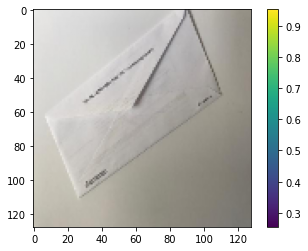

In [16]:
#Displaying A Picture from the Training Set
plt.figure()
plt.imshow(trainX[1]/255)
plt.colorbar()
plt.grid(False)
plt.show()


In [17]:
if shuffle:
  garb_img = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=20,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True,
      #brightness_range=[0.2,1],
      #zoom_range=0.2,
      #featurewise_center=True,
      #featurewise_std_normalization=True,
      #fill_mode = 'nearest'
  )


In [ ]:
#data_augmentation = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  #tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [18]:
train_datasetgen = garb_img.flow(

          trainX, 
          trainY, 
          batch_size= BATCH_SIZE,
          shuffle=True,
  )

val_datasetgen = garb_img.flow(
          validX, 
          validY, 
          batch_size= BATCH_SIZE,
          shuffle=True,
  )


In [19]:
#Modelling
from tensorflow.keras.applications import MobileNet
mobilenet_model = MobileNet(
    include_top=False, #Most important--last layer is included
    weights="imagenet",
    alpha=1.0,
    #dropout=0.01,
    depth_multiplier=1,
    classes=1000,
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation="softmax",)
mobilenet_model.trainable = False # freeze the orignianl layers of the mobilenet model
mn=True

17227776/17225924 [==============================] - 0s 0us/step


In [20]:
mobilenet_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [21]:
class TransferLearning():
   def modelmn(self):
    X = mobilenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(6,activation='sigmoid')(X)
    shorter_model = Model(mobilenet_model.inputs, outputs=X)
    return shorter_model

In [22]:
my_model = TransferLearning()
my_model = my_model.modelmn()
base_learning_rate=0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
mc = ModelCheckpoint('2017ee57.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)

In [23]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/ 

In [24]:
EPOCHS = 10
history = my_model.fit(
    x= train_datasetgen,
    validation_data = val_datasetgen, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/10
64/64 [==============================] - 37s 542ms/step - loss: 4.6718 - accuracy: 0.3258 - val_loss: 4.0130 - val_accuracy: 0.5553
Epoch 2/10
64/64 [==============================] - 34s 525ms/step - loss: 3.7927 - accuracy: 0.6361 - val_loss: 3.4740 - val_accuracy: 0.6719
Epoch 3/10
64/64 [==============================] - 34s 526ms/step - loss: 3.2738 - accuracy: 0.7490 - val_loss: 3.2368 - val_accuracy: 0.6917
Epoch 4/10
64/64 [==============================] - 34s 527ms/step - loss: 2.9600 - accuracy: 0.7841 - val_loss: 3.0326 - val_accuracy: 0.7213
Epoch 5/10
64/64 [==============================] - 34s 528ms/step - loss: 2.7350 - accuracy: 0.8346 - val_loss: 2.8235 - val_accuracy: 0.7549
Epoch 6/10
64/64 [==============================] - 34s 528ms/step - loss: 2.5164 - accuracy: 0.8490 - val_loss: 2.6840 - val_accuracy: 0.7549
Epoch 7/10
64/64 [==============================] - 34s 527ms/step - loss: 2.3328 - accuracy: 0.8630 - val_loss: 2.5536 - val_accuracy: 0.7490

In [25]:
ft_mobilenet_model = MobileNet(
    include_top=False, #Most important--last layer is included
    weights="imagenet",
    alpha=1.0,
    dropout=0.001,
    depth_multiplier=1,
    classes=1000,
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation="softmax",)
ft_mobilenet_model.trainable = True # freeze the orignianl layers of the mobilenet model
mn=True

In [26]:
print("Number of layers in the base model: ", len(ft_mobilenet_model.layers))


Number of layers in the base model:  86


In [40]:
# Fine-tune from this layer onwards
fine_tune_at = 78

# Freeze all the layers before the `fine_tune_at` layer
for layer in ft_mobilenet_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [41]:
ft_mobilenet_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [42]:
class TransferLearning2():
   def modelmn2(self):
    X = ft_mobilenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-1))(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-1))(X)
    X = Dense(6,activation='sigmoid')(X)
    shorter_model = Model(ft_mobilenet_model.inputs, outputs=X)
    return shorter_model

In [43]:
my_model = TransferLearning2()
my_model = my_model.modelmn2()
base_learning_rate=0.001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
mc = ModelCheckpoint('ai_trash_fyp24.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)

In [44]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [48]:
EPOCHS = 10
history = my_model.fit(
    x= train_datasetgen,
    validation_data = val_datasetgen, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/10
64/64 [==============================] - 46s 725ms/step - loss: 0.8598 - accuracy: 0.9861 - val_loss: 1.1196 - val_accuracy: 0.8419
Epoch 2/10
64/64 [==============================] - 46s 726ms/step - loss: 0.7907 - accuracy: 0.9832 - val_loss: 1.2286 - val_accuracy: 0.8182
Epoch 3/10
64/64 [==============================] - 47s 738ms/step - loss: 0.7785 - accuracy: 0.9847 - val_loss: 1.2018 - val_accuracy: 0.8458
Epoch 4/10
64/64 [==============================] - 47s 740ms/step - loss: 0.8185 - accuracy: 0.9842 - val_loss: 1.1882 - val_accuracy: 0.8281
Epoch 5/10
64/64 [==============================] - 47s 732ms/step - loss: 0.7451 - accuracy: 0.9906 - val_loss: 1.1271 - val_accuracy: 0.8478
Epoch 6/10
64/64 [==============================] - 47s 738ms/step - loss: 0.7519 - accuracy: 0.9896 - val_loss: 1.2066 - val_accuracy: 0.8182
Epoch 7/10
64/64 [==============================] - 48s 743ms/step - loss: 0.7483 - accuracy: 0.9916 - val_loss: 1.2318 - val_accuracy: 0.8518

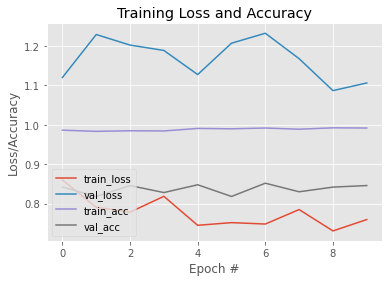

In [49]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [70]:
tflite_model_name = 'garbagemn_model'
tflite_model_name_no_quant = 'garbagemn_model_noquant'
c_model_name = 'garbagemn_model'

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(my_model)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(tflite_model_name_no_quant + '.tflite', "wb").write(model_no_quant_tflite)

def representative_dataset():
  for i in range(2021):
      data = np.random.rand(1, 128, 128, 3)
      yield [data.astype(np.float32)]
converter=tf.lite.TFLiteConverter.from_keras_model(my_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpmo7glids/assets


INFO:tensorflow:Assets written to: /tmp/tmpmo7glids/assets


INFO:tensorflow:Assets written to: /tmp/tmpd1s2t74p/assets


INFO:tensorflow:Assets written to: /tmp/tmpd1s2t74p/assets


3862504

In [71]:
size_original_tf = os.path.getsize('ai_trash_fyp24.h5')
size_tf = os.path.getsize(tflite_model_name + '.tflite')
size_no_quant_tflite = os.path.getsize(tflite_model_name_no_quant + '.tflite')

In [72]:
import pandas as pd
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_original_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_original_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tf} bytes", f"(reduced by {size_no_quant_tflite - size_tf} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,24866536 bytes,
TensorFlow Lite,13850332 bytes,(reduced by 11016204 bytes)
TensorFlow Lite Quantized,3862504 bytes,(reduced by 9987828 bytes)


In [73]:
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nunsigned int' + var_name + '_len =' + str(len(hex_data)) + ';\n'

  c_str += 'unsigned char' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    hex_str = format(val, '#04x')

    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

    c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str
    

In [74]:
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))